In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder


In [62]:
df = pd.read_csv("/content/Housing.csv")

In [63]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [64]:
df.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [65]:
df.shape

(545, 13)

In [66]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,545.00,545.00,545.00,545.00,545.00,545.00
mean,4766729.25,5150.54,2.97,1.29,1.81,0.69
std,1870439.62,2170.14,0.74,0.50,0.87,0.86
min,1750000.00,1650.00,1.00,1.00,1.00,0.00
25%,3430000.00,3600.00,2.00,1.00,1.00,0.00
50%,4340000.00,4600.00,3.00,1.00,2.00,0.00
75%,5740000.00,6360.00,3.00,2.00,2.00,1.00
max,13300000.00,16200.00,6.00,4.00,4.00,3.00


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [68]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
categorical_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']

for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

for col in categorical_columns:
    print(f"Encoded values for {col}:", df[col].unique())


Encoded values for mainroad: [1 0]
Encoded values for guestroom: [0 1]
Encoded values for basement: [0 1]
Encoded values for hotwaterheating: [0 1]
Encoded values for airconditioning: [1 0]
Encoded values for prefarea: [1 0]
Encoded values for furnishingstatus: [0 1 2]


In [69]:
df.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


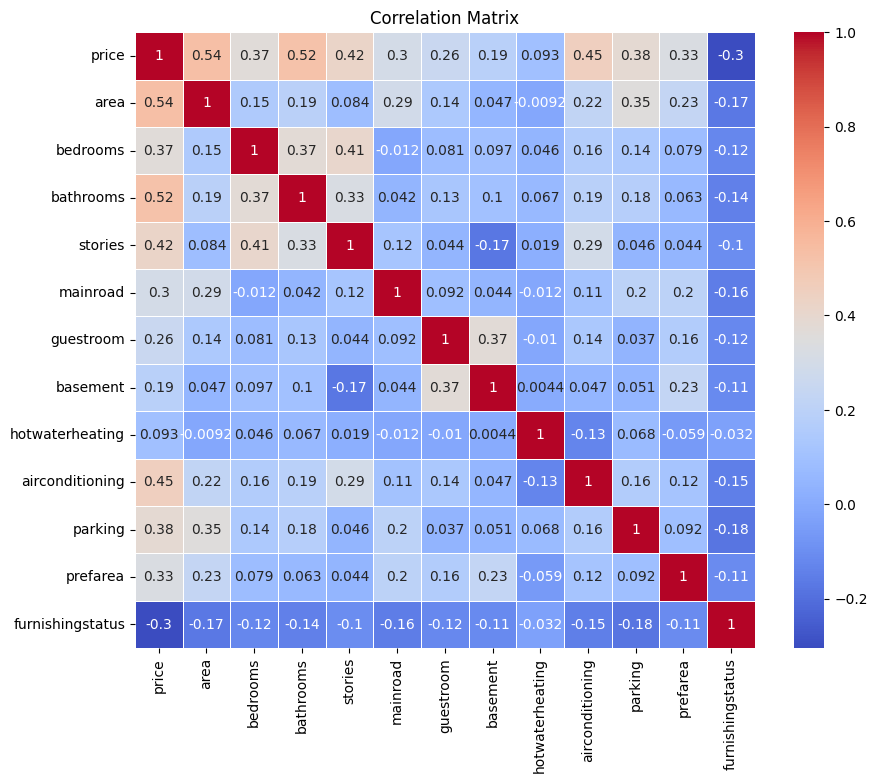

In [70]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

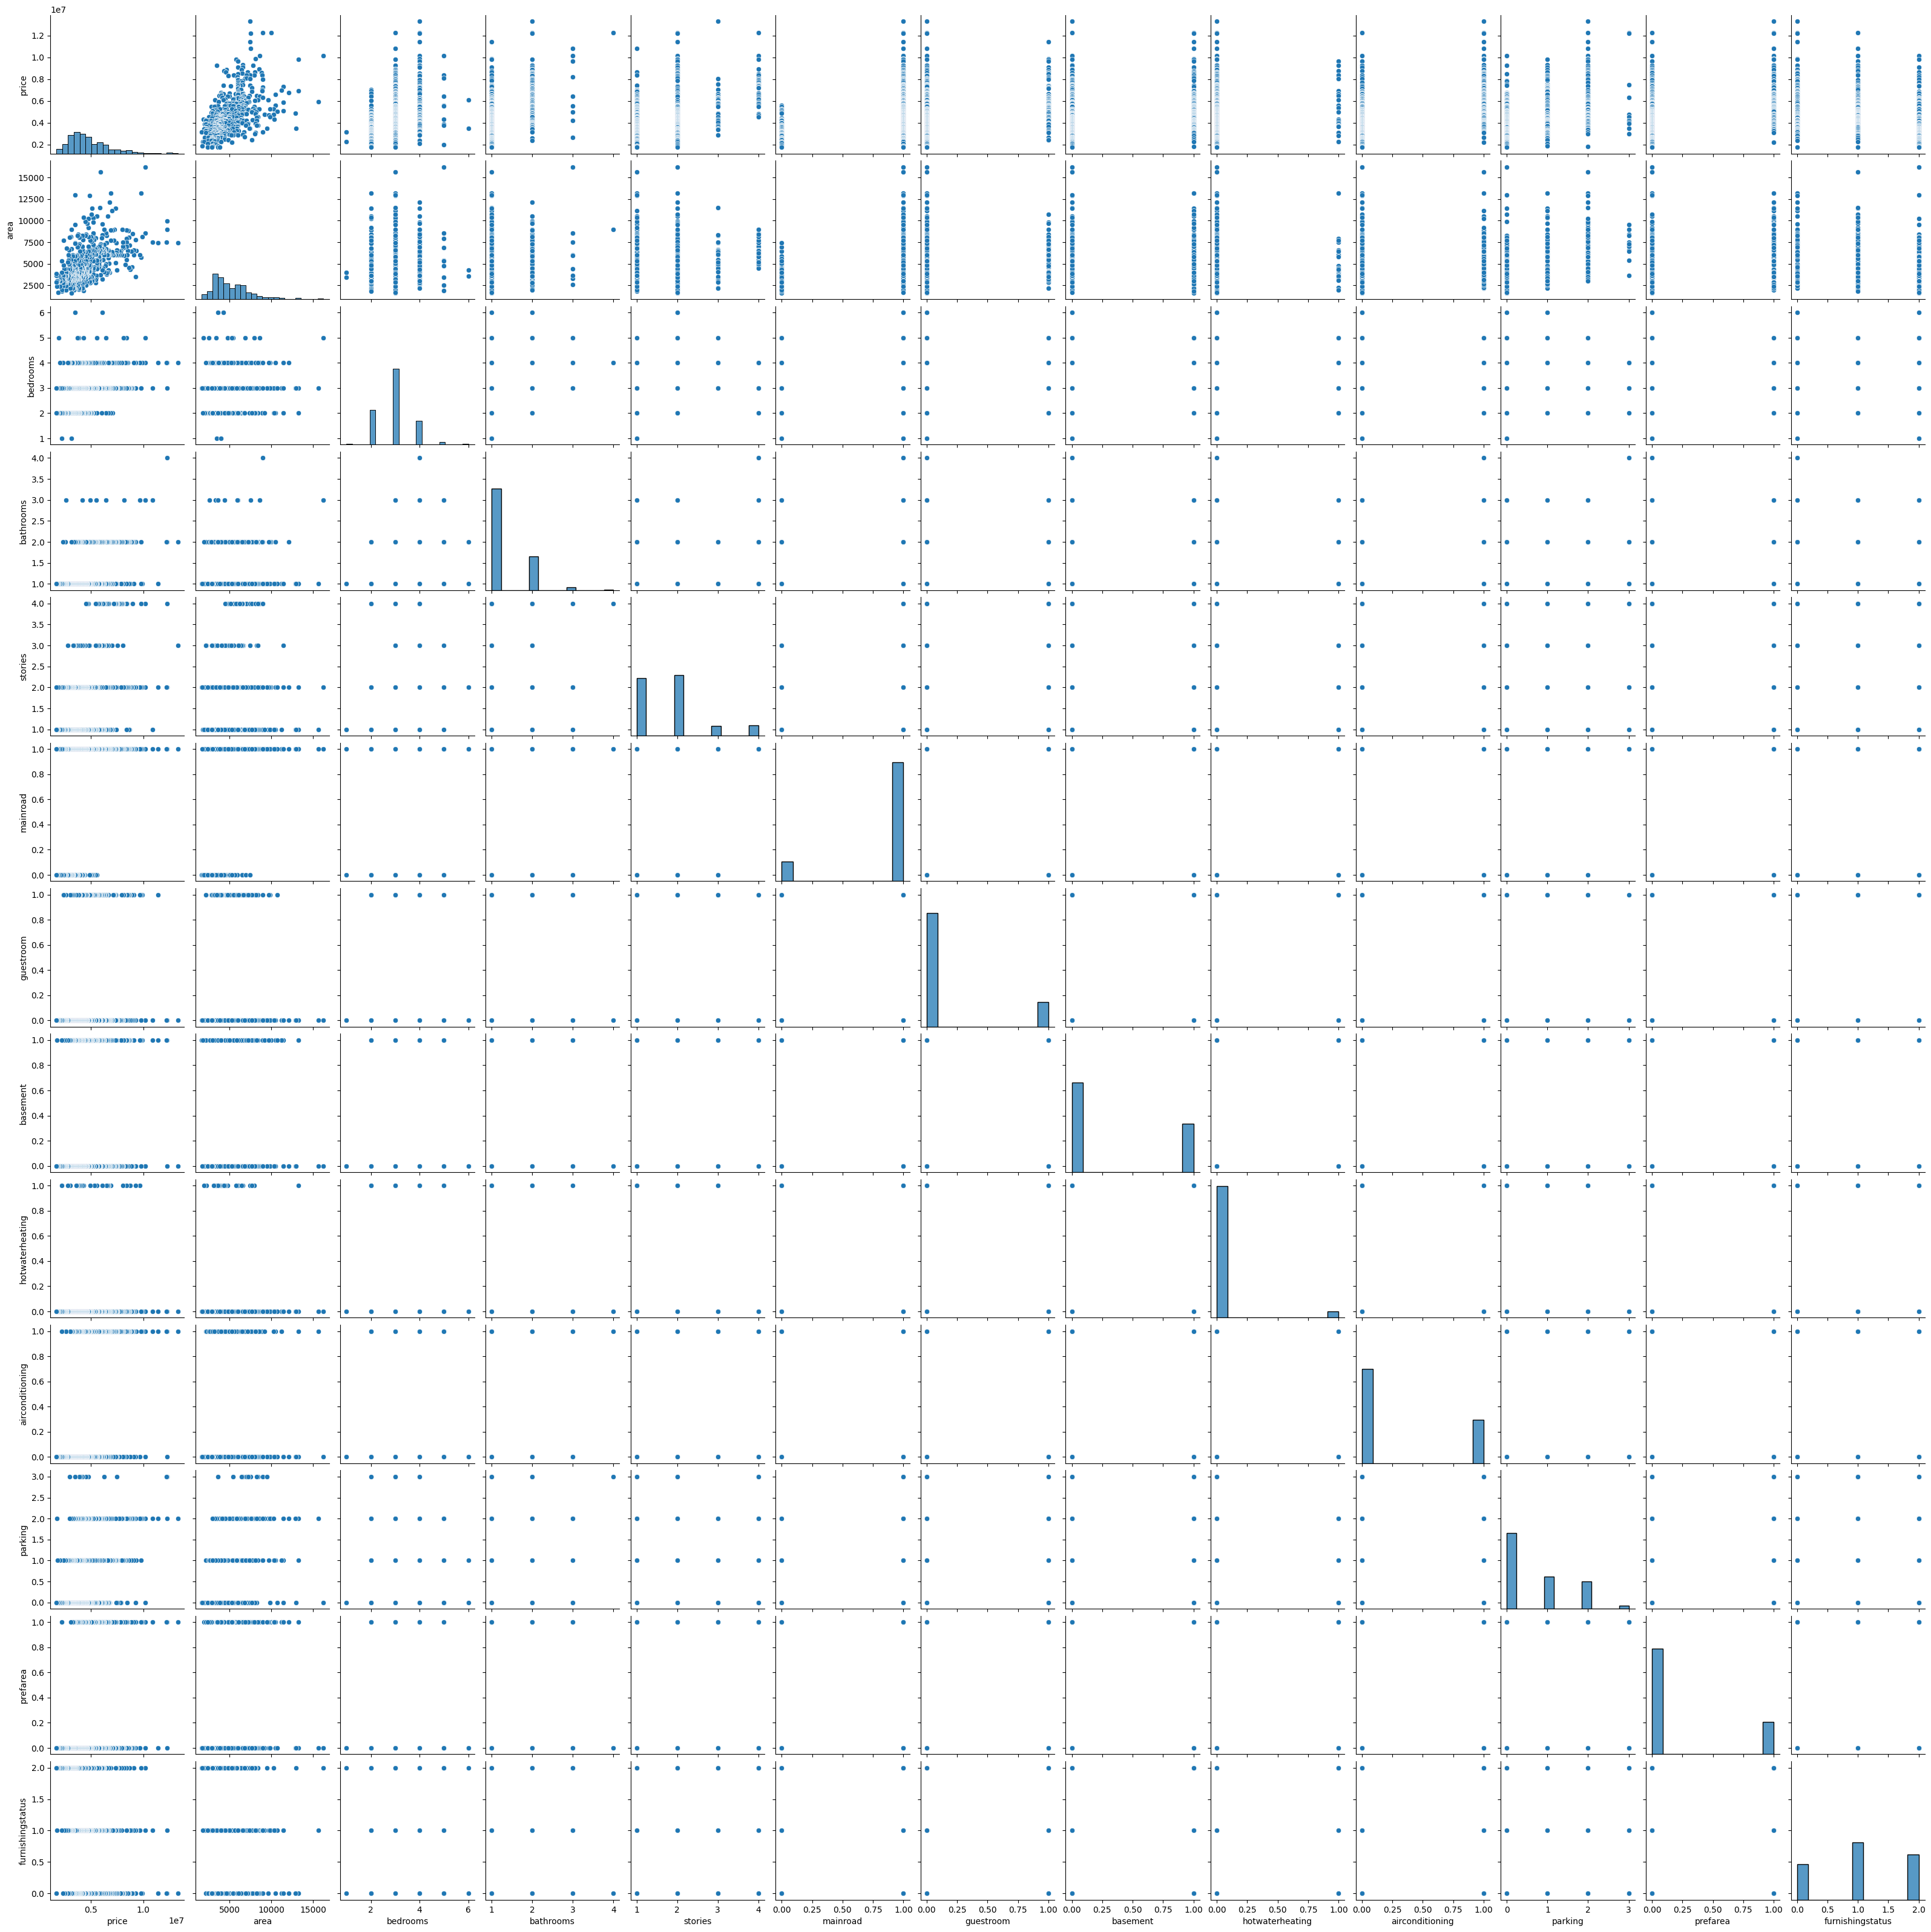

In [71]:
sns.pairplot(df)

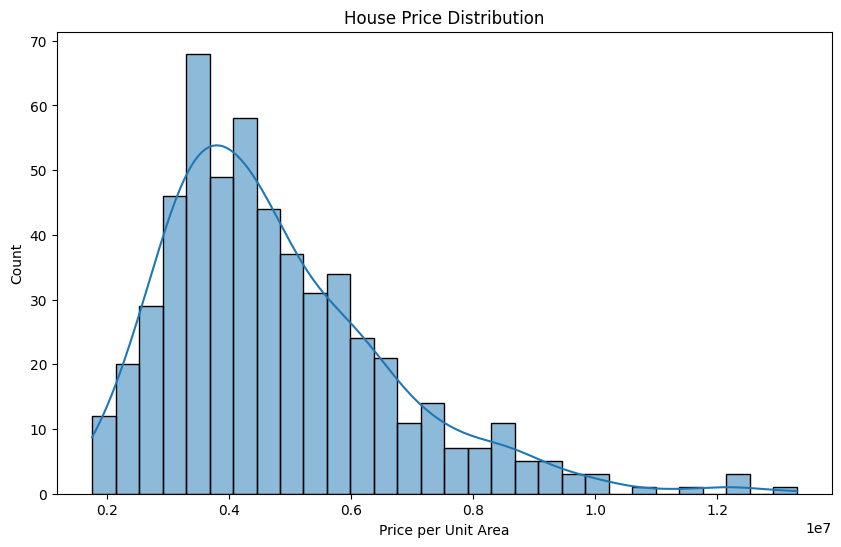

In [72]:
# Distribution of House Prices
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=30, kde=True)
plt.title("House Price Distribution")
plt.xlabel("Price per Unit Area")
plt.show()

In [73]:
X = df[['area',	'bedrooms',	'bathrooms',	'stories',	'mainroad',	'guestroom',	'basement',	'hotwaterheating',	'airconditioning',	'parking',	'prefarea',	'furnishingstatus']]
y = df['price']

In [74]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

             feature   VIF
0               area  8.27
1           bedrooms 16.37
2          bathrooms  9.41
3            stories  7.88
4           mainroad  6.85
5          guestroom  1.47
6           basement  2.01
7    hotwaterheating  1.09
8    airconditioning  1.76
9            parking  1.99
10          prefarea  1.49
11  furnishingstatus  2.65


In [75]:
X = X.drop(columns=["bedrooms"])

In [76]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

             feature  VIF
0               area 7.69
1          bathrooms 7.95
2            stories 6.31
3           mainroad 6.71
4          guestroom 1.47
5           basement 1.91
6    hotwaterheating 1.09
7    airconditioning 1.76
8            parking 1.98
9           prefarea 1.49
10  furnishingstatus 2.46


In [77]:
X = X.drop(columns=["bathrooms"])

In [78]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

            feature  VIF
0              area 7.05
1           stories 4.87
2          mainroad 6.65
3         guestroom 1.47
4          basement 1.81
5   hotwaterheating 1.08
6   airconditioning 1.75
7           parking 1.97
8          prefarea 1.49
9  furnishingstatus 2.40


In [79]:
X = X.drop(columns=["mainroad"])

In [80]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

            feature  VIF
0              area 5.61
1           stories 4.23
2         guestroom 1.47
3          basement 1.78
4   hotwaterheating 1.08
5   airconditioning 1.75
6           parking 1.94
7          prefarea 1.47
8  furnishingstatus 2.32


In [81]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [82]:
scaler=StandardScaler()
X_train_Scaled=scaler.fit_transform(X_train)
X_test_Scaled=scaler.transform(X_test)

In [83]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [84]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R2 Score: {r2}")

Mean Squared Error: 1954856936900.0312
Root Mean Squared Error: 1398161.985214886
R2 Score: 0.6132496252657869


In [85]:
pd.options.display.float_format = '{:.2f}'.format
comparison = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
print("\nActual vs Predicted:\n", comparison.head())


Actual vs Predicted:
       Actual  Predicted
316  4060000 4802435.52
77   6650000 6671408.21
360  3710000 3011483.58
90   6440000 4767449.57
493  2800000 3234456.28


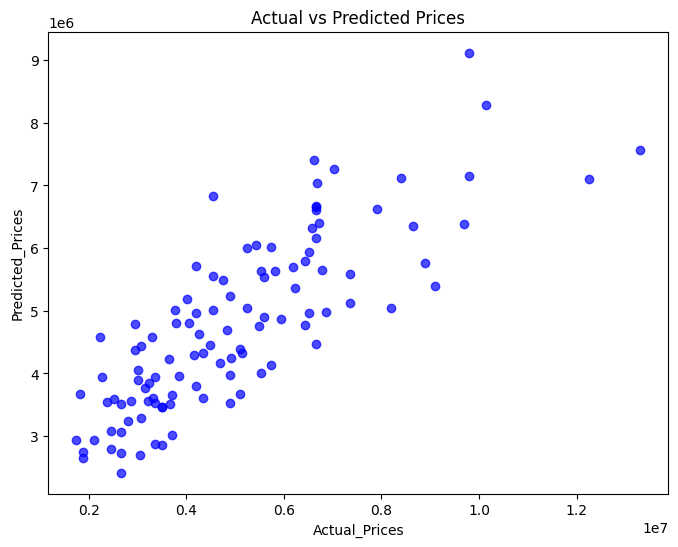

In [86]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color="blue")
plt.xlabel("Actual_Prices")
plt.ylabel("Predicted_Prices")
plt.title("Actual vs Predicted Prices")
plt.show()

In [87]:
print("\nMost Influential Features (based on coefficients):")
print(coefficients.sort_values(by="Coefficient", ascending=False))


Most Influential Features (based on coefficients):
            Feature  Coefficient
5   airconditioning    853255.79
4   hotwaterheating    764677.04
1           stories    632705.57
7          prefarea    603897.77
3          basement    564656.05
6           parking    315929.44
2         guestroom    227416.67
0              area       281.25
8  furnishingstatus   -245473.08


In [88]:
from sklearn.ensemble import RandomForestRegressor
M1 = RandomForestRegressor(n_estimators=100, random_state=42)
M1.fit(X_train,y_train)
Y_PRED = M1.predict(X_test)
MSE1 = mean_squared_error(y_test,Y_PRED)
R2 = r2_score(y_test,Y_PRED)
print("MSE:", MSE1)
print("R2:", R2)

MSE: 2267199094430.6484
R2: 0.5514556166147915


In [89]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)

y_pred_dtr = dtr.predict(X_test)
R2_Score_dtr = r2_score(y_test,y_pred_dtr)
mse_dtr = mean_squared_error(y_test,y_pred_dtr)
print("MSE : ",mse_dtr)
print("R2 Score : ",R2_Score_dtr)

MSE :  2905404538990.8257
R2 Score :  0.4251925688275323
